In [5]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


In [6]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
theta_best

array([[3.97126114],
       [2.98282081]])

In [8]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.97126114],
       [9.93690277]])

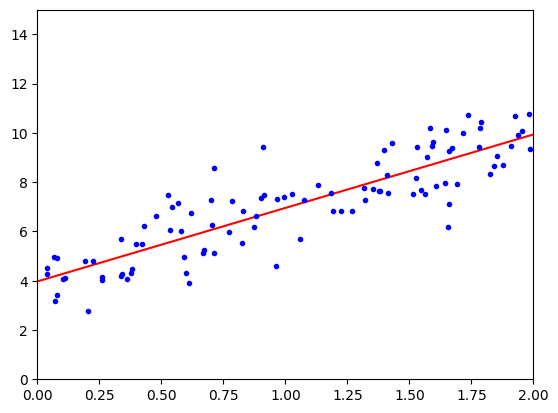

In [9]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()


In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[3.97126114],
       [9.93690277]])

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.97126114],
       [2.98282081]])

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[3.97126114],
       [2.98282081]])

In [13]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
 gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
 theta = theta - eta * gradients
theta

array([[3.97126114],
       [2.98282081]])

In [14]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
 return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
 for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients
   


In [15]:
theta 

array([[3.92939738],
       [2.98333211]])

In [16]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_


(array([3.84696462]), array([2.86610562]))

In [17]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]
X_poly[0]

array([-1.41820092,  2.01129385])

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_


(array([1.63331406]), array([[1.04194691, 0.53935054]]))

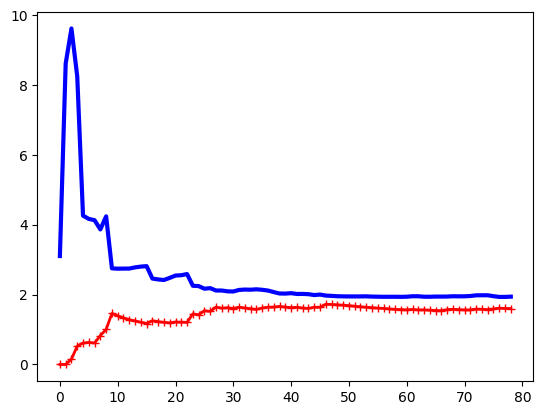

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
 X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
 train_errors, val_errors = [], []
 for m in range(1, len(X_train)):
  model.fit(X_train[:m], y_train[:m])
  y_train_predict = model.predict(X_train[:m])
  y_val_predict = model.predict(X_val)
  train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
  val_errors.append(mean_squared_error(y_val, y_val_predict))
 plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
 plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)


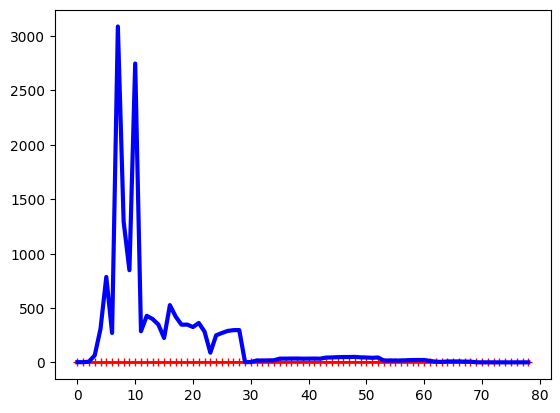

In [21]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
 ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
 ("lin_reg", LinearRegression()),
 ])
plot_learning_curves(polynomial_regression, X, y)

In [22]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

Ridge(alpha=1, solver='cholesky')

In [23]:
ridge_reg.predict([[1.5]])

array([[4.49356265]])

In [24]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])


array([4.44686792])

In [25]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.43832449])

In [26]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])


array([4.44401423])

In [27]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
list(iris.keys())
['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(int)

In [28]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)


LogisticRegression()

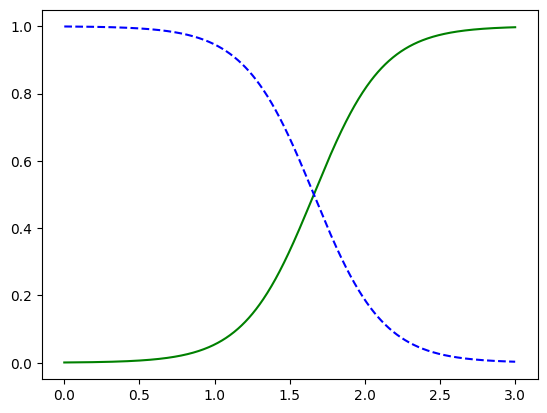

In [29]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

In [30]:
log_reg.predict([[1.7], [1.5]])


array([1, 0])

In [32]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [34]:
softmax_reg.predict([[5, 2]])




array([2])

In [35]:
softmax_reg.predict_proba([[5, 2]])

array([[6.21626372e-07, 5.73689802e-02, 9.42630398e-01]])